In [1]:
!pip install pandas numpy yfinance matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [3]:
data=yf.download('NVDA')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
1999-01-22,0.037605,0.044767,0.035575,0.040112,2714688000
1999-01-25,0.041545,0.042021,0.037605,0.040589,510480000
1999-01-26,0.038321,0.042857,0.037724,0.042021,343200000
1999-01-27,0.038202,0.039395,0.036291,0.038440,244368000
1999-01-28,0.038082,0.038440,0.037843,0.038202,227520000


In [9]:
 data['Returns']=data['Close'].pct_change()

In [11]:
num_simulations=10000
num_days=22

last_price = float(data['Close'].iloc[-1])

simulation_df=np.zeros ((num_days, num_simulations))

mu = float(data['Returns'].mean())
sigma = float(data['Returns'].std())


C:\Users\suyas\AppData\Local\Temp\ipykernel_36632\2109498027.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_price = float(data['Close'].iloc[-1])


St​=St−1​×exp((μ−0.5σ2)+σεt​)

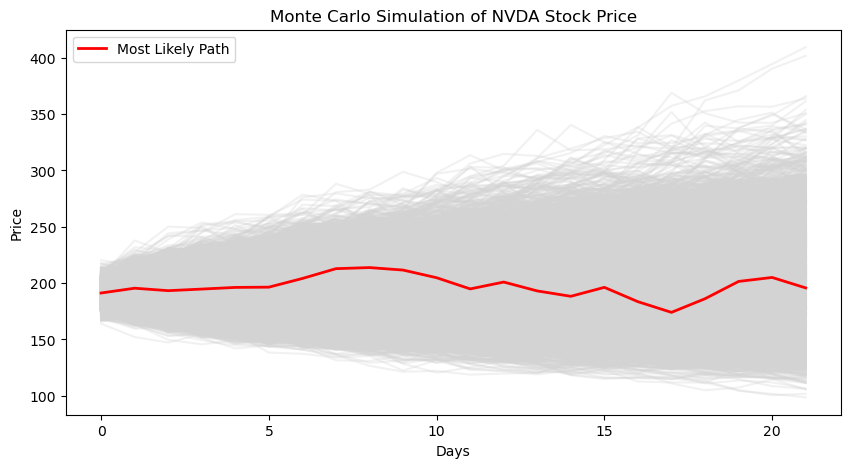

In [16]:
# Monte Carlo Simulation

for simulation in range(num_simulations):
    price_list = [last_price]

    for d in range(num_days):
        shock = float(np.random.normal(0, 1))  # FORCE scalar
        prev_price = float(price_list[-1])

        price = prev_price * np.exp(
            (mu - 0.5 * sigma**2) + sigma * shock
        )

        price_list.append(float(price))

    # FORCE 1D shape
    simulation_df[:, simulation] = np.array(price_list[1:]).flatten()

# Post-simulation analysis 

# prices on the final day for all simulations
final_prices = simulation_df[-1, :]

# median final price
median_final_price = np.median(final_prices)

# index of simulation closest to median outcome
most_likely_simulation_index = np.argmin(
    np.abs(final_prices - median_final_price)
)

# full path of the most likely simulation
most_likely_simulation = simulation_df[:, most_likely_simulation_index]

plt.figure(figsize=(10, 5))
plt.plot(simulation_df, color="lightgray", alpha=0.3)
plt.plot(most_likely_simulation, color="red", linewidth=2, label="Most Likely Path")
plt.title("Monte Carlo Simulation of NVDA Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [18]:
print(f"The most likely simulation's final price is: {most_likely_simulation[-1]}")

The most likely simulation's final price is: 195.74885840015648


Compute Percentiles (P10, P50, P90)

In [39]:
# Final prices at the end of simulation horizon
final_prices = simulation_df[-1, :]

# Percentiles
p10 = np.percentile(final_prices, 10)
p50 = np.percentile(final_prices, 50)
p90 = np.percentile(final_prices, 90)

print(f"P10 (Worst 10%): {p10:.2f}")
print(f"P50 (Median):   {p50:.2f}")
print(f"P90 (Best 10%): {p90:.2f}")


P10 (Worst 10%): 155.98
P50 (Median):   195.75
P90 (Best 10%): 245.64


In [41]:
data.tail()

Price,Close,High,Low,Open,Volume,Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2025-12-19,180.990005,181.449997,176.339996,176.669998,324925900,0.039336
2025-12-22,183.690002,184.160004,182.350006,183.919998,129064400,0.014918
2025-12-23,189.210007,189.330002,182.899994,182.970001,174873600,0.030051
2025-12-24,188.610001,188.910004,186.589996,187.940002,65528500,-0.003171
2025-12-26,190.529999,192.690002,188.000000,189.919998,139393400,0.010180


Plot Percentile Bands on Price Paths

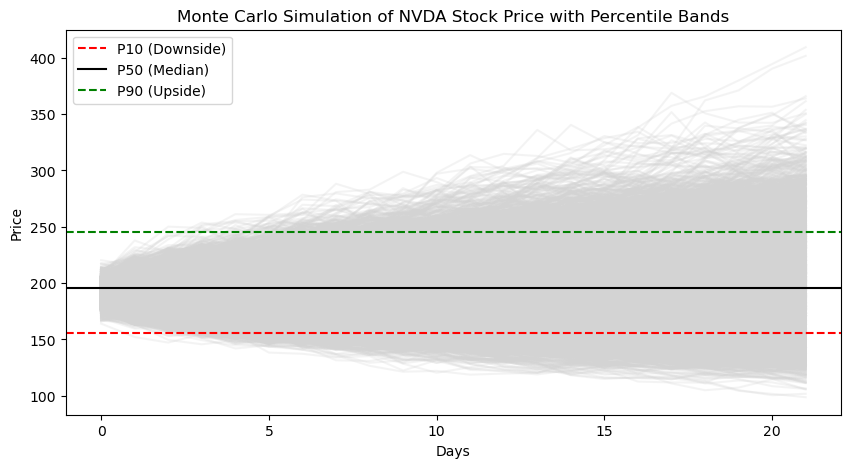

In [44]:
plt.figure(figsize=(10, 5))

# All simulation paths
plt.plot(simulation_df, color="lightgray", alpha=0.25)

# Percentile lines
plt.axhline(p10, color="red", linestyle="--", label="P10 (Downside)")
plt.axhline(p50, color="black", linestyle="-", label="P50 (Median)")
plt.axhline(p90, color="green", linestyle="--", label="P90 (Upside)")

plt.title("Monte Carlo Simulation of NVDA Stock Price with Percentile Bands")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Histogram of Final Prices

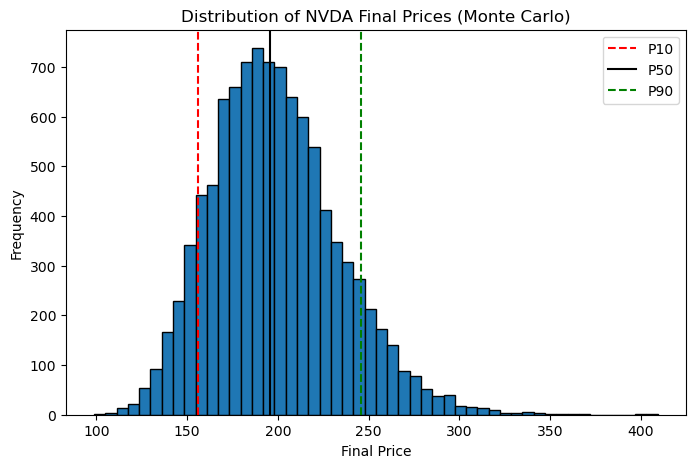

In [46]:
plt.figure(figsize=(8, 5))
plt.hist(final_prices, bins=50, edgecolor="black")
plt.axvline(p10, color="red", linestyle="--", label="P10")
plt.axvline(p50, color="black", linestyle="-", label="P50")
plt.axvline(p90, color="green", linestyle="--", label="P90")

plt.title("Distribution of NVDA Final Prices (Monte Carlo)")
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [47]:
prob_above_210 = np.mean(final_prices > 210)
print(f"Probability NVDA > $210: {prob_above_210:.2%}")


Probability NVDA > $210: 34.42%


In [48]:
prob_below_170 = np.mean(final_prices < 170)
print(f"Probability NVDA < $170: {prob_below_170:.2%}")


Probability NVDA < $170: 20.95%
